# Importing required packages and uploading required files

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

store_data = pd.read_csv(r"C:\Users\Admin\stores_data_set.csv")
feature_data = pd.read_csv(r"C:\Users\Admin\Features_data_set.csv")
sales_data = pd.read_csv(r"C:\Users\Admin\sales_data_set.csv")


# To merge data from one file into another file using a 'merge()' function

In [35]:
df1 = sales_data.merge(feature_data,on=['Store','Date','IsHoliday'],how = 'inner')
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [37]:
df = df1.merge(store_data,on=['Store'],how = 'inner')
# df.iloc[6550:6600]
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,93,26/10/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,26/10/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,26/10/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,26/10/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421569,45,98,26/10/2012,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [39]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

# Using date column extracting the some features

In [56]:
import warnings
warnings.filterwarnings("ignore")


df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
# df['month'] = df['Date'].dt.month
# df['day'] = df['Date'].dt.day
df['year_of_week'] = df['Date'].dt.week

In [58]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,year_of_week,Markdown
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,43,5247.26
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,43,5247.26
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,43,5247.26
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,43,5247.26
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,43,5247.26


# Adding all markdown column in single column

In [65]:
df.loc[(df['MarkDown1'].isnull()==True),'MarkDown1'] = 0
df.loc[(df['MarkDown2'].isnull()==True),'MarkDown2'] = 0
df.loc[(df['MarkDown3'].isnull()==True),'MarkDown3'] = 0
df.loc[(df['MarkDown4'].isnull()==True),'MarkDown4'] = 0
df.loc[(df['MarkDown5'].isnull()==True),'MarkDown5'] = 0

df['Markdown'] = df['MarkDown1']+df['MarkDown2']+df['MarkDown3']+df['MarkDown4']+df['MarkDown5']



In [69]:
import numpy as np
df['Markdown'].replace(0, np.nan, inplace=True)

In [71]:
data = df.copy()
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,year_of_week,Markdown
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,17,NaN
1,1,2,2010-05-02,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,17,NaN
2,1,3,2010-05-02,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,17,NaN
3,1,4,2010-05-02,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,17,NaN
4,1,5,2010-05-02,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,17,NaN


In [75]:
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown
0,1,1,2010-05-02,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN
1,1,2,2010-05-02,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN
2,1,3,2010-05-02,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN
3,1,4,2010-05-02,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN
4,1,5,2010-05-02,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,192.308899,8.667,B,118221,2012,43,5247.26
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,192.308899,8.667,B,118221,2012,43,5247.26
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,192.308899,8.667,B,118221,2012,43,5247.26
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,192.308899,8.667,B,118221,2012,43,5247.26


# Checking correlation between columns

<Axes: >

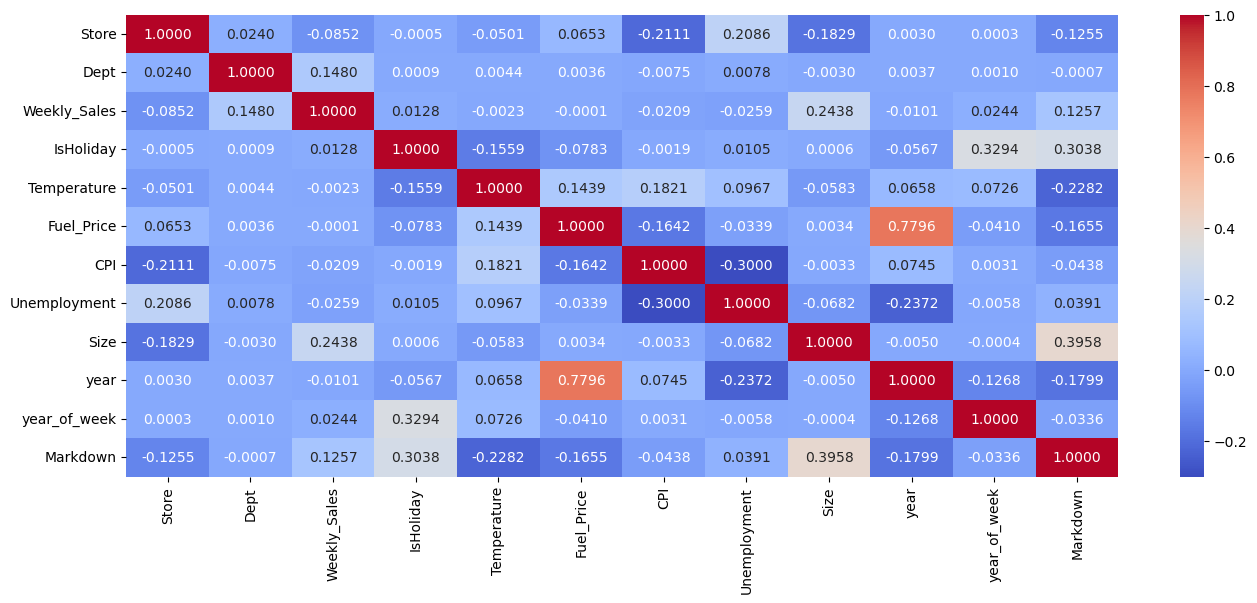

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".4f")

In [80]:
len(data['Fuel_Price'].unique())

892

In [82]:
import scipy.stats as st
st.f_oneway(data['Fuel_Price'],data['year'])

F_onewayResult(statistic=2010220620212.2874, pvalue=0.0)

# Checking the outlier using boxplot chart

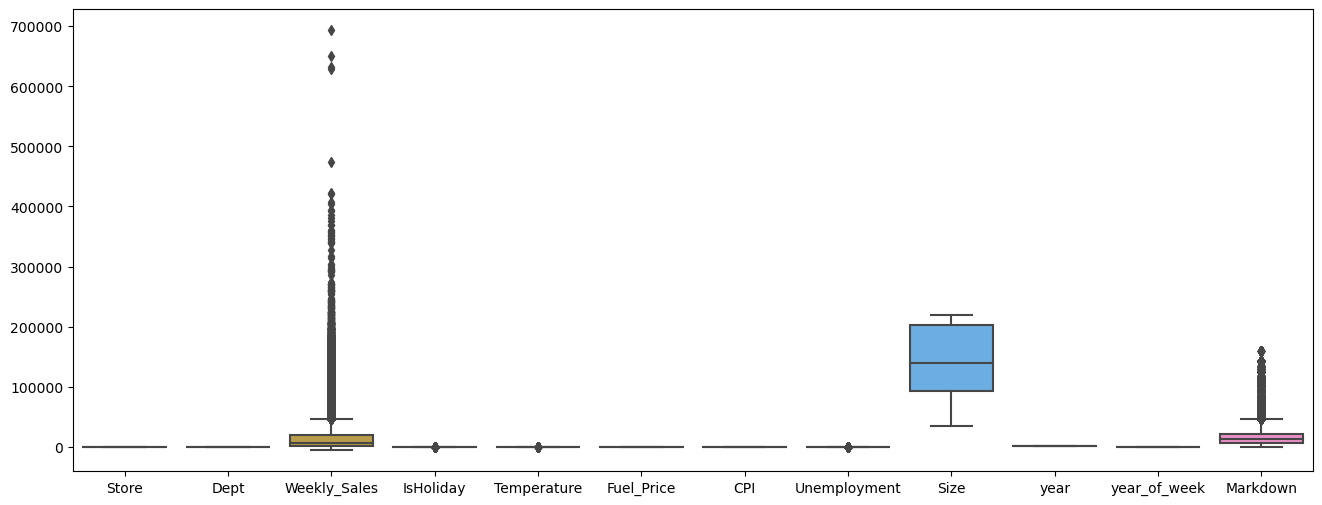

In [85]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data)
plt.show()

# Checking data distribution

Store


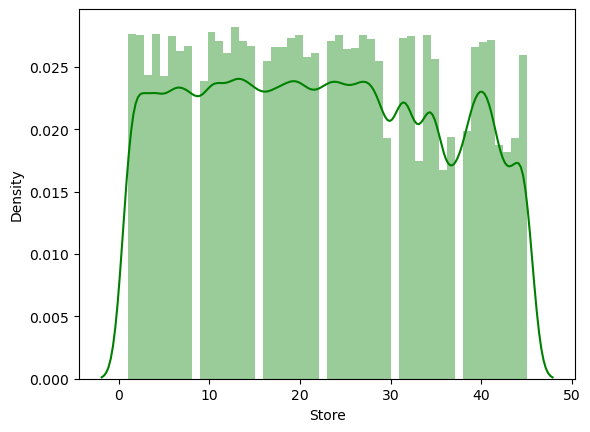

Dept


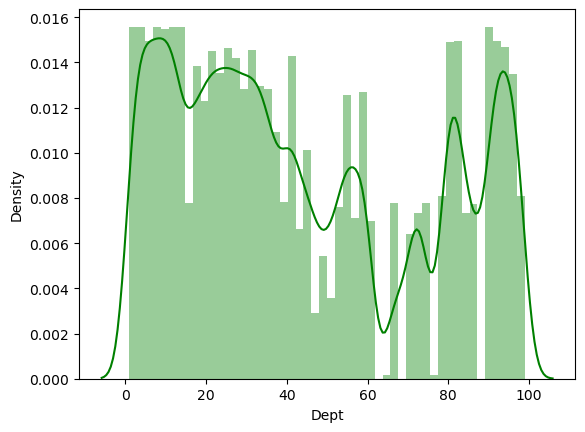

Date


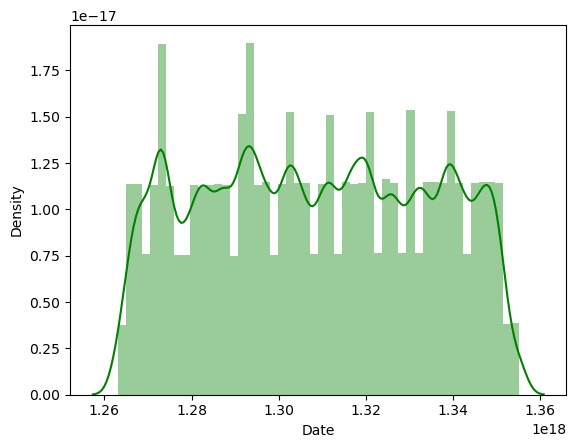

Weekly_Sales


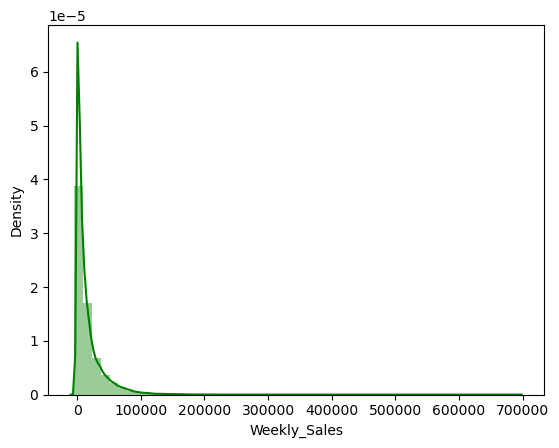

IsHoliday


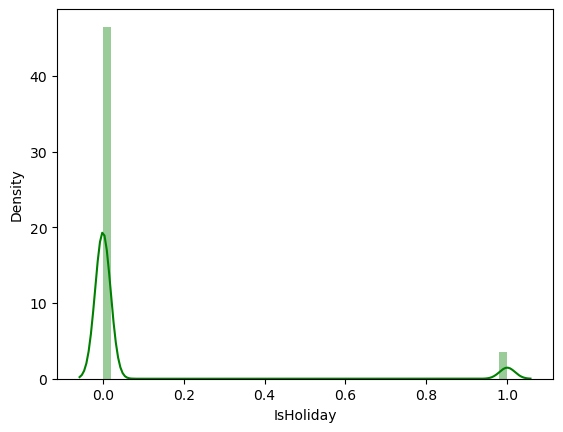

Temperature


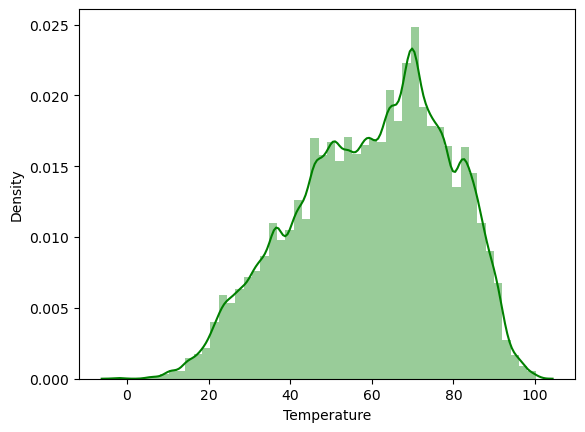

Fuel_Price


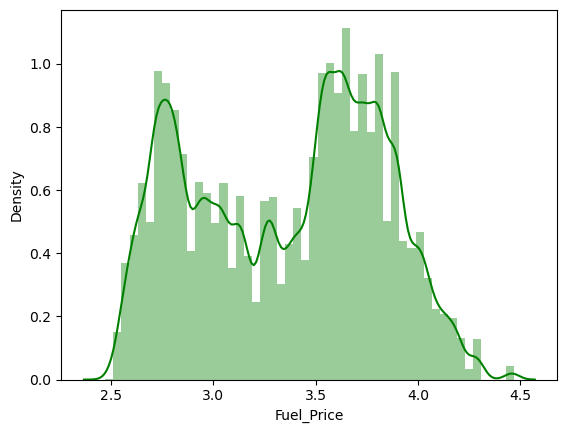

CPI


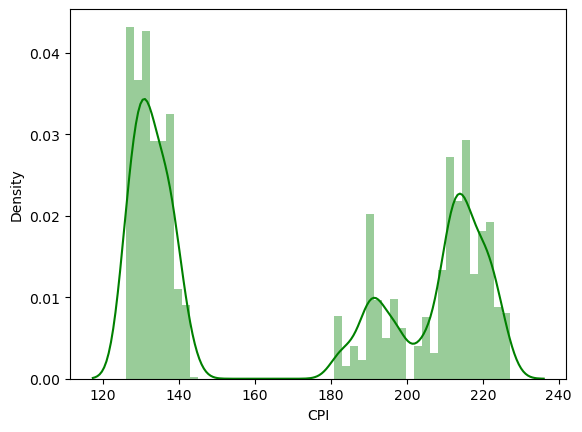

Unemployment


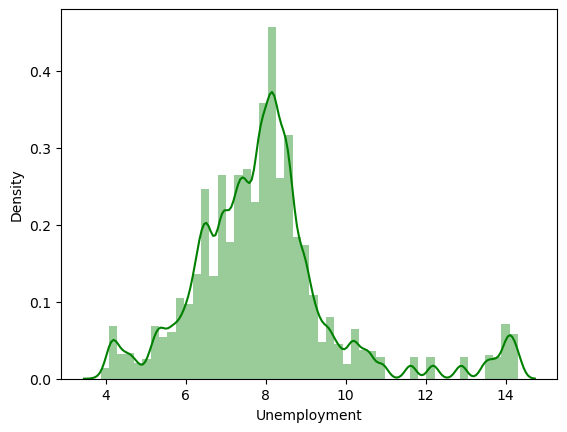

Size


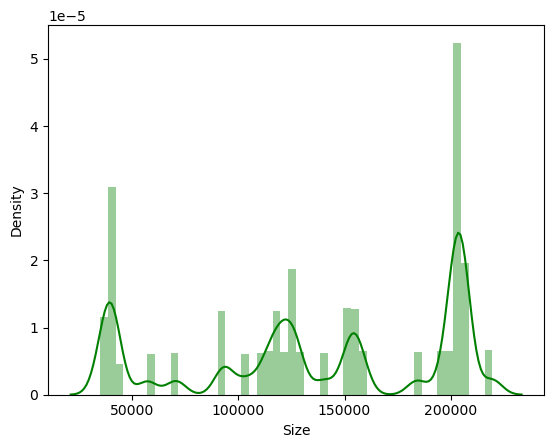

year


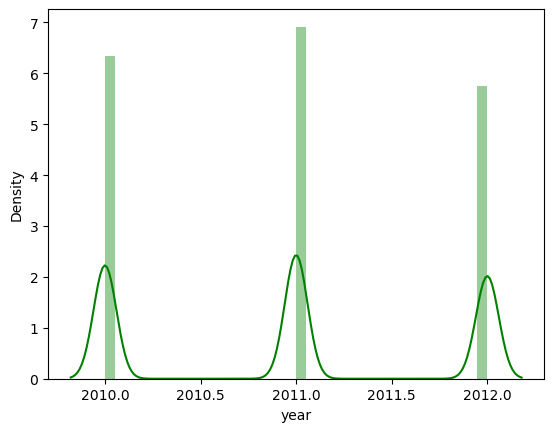

year_of_week


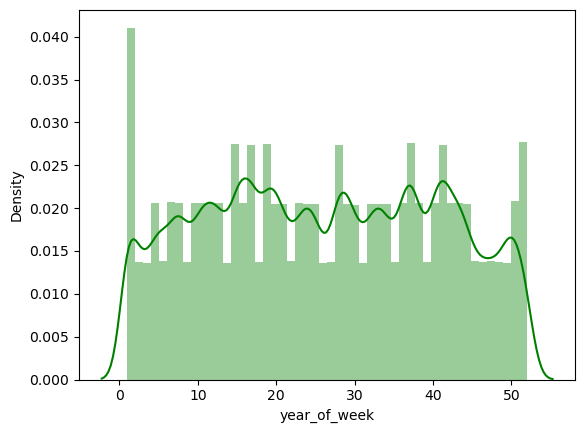

Markdown


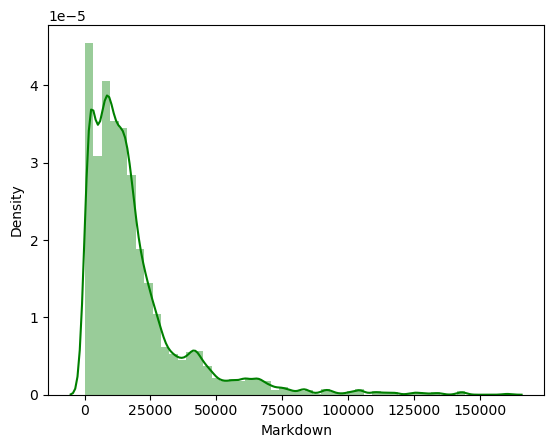

In [88]:
for i in data.columns:
  if data[i].dtype != 'object':
    print(i)
    sns.distplot(data[i],color="g")
    plt.show()

In [90]:
null = data[(data['Weekly_Sales']==0)]
null

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown
4132,1,47,2011-11-03,0.0,False,53.56,3.459,214.111056,7.742,A,151315,2011,44,NaN
5691,1,47,2011-12-08,0.0,False,90.76,3.638,215.605788,7.962,A,151315,2011,49,NaN
5762,1,47,2011-08-19,0.0,False,89.94,3.554,215.669311,7.962,A,151315,2011,33,NaN
10732,2,60,2010-03-19,0.0,False,54.52,2.720,210.873332,8.324,A,202307,2010,11,NaN
18449,2,47,2012-04-13,0.0,False,68.08,3.891,221.148403,6.891,A,202307,2012,15,21715.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402827,43,85,2012-01-13,0.0,False,43.68,3.261,211.411571,9.653,C,41062,2012,2,2327.99
407180,44,27,2011-01-14,0.0,False,20.60,2.903,127.300935,7.224,C,39910,2011,2,NaN
414388,45,54,2010-10-15,0.0,False,58.61,2.868,182.810620,8.724,B,118221,2010,41,NaN
415525,45,47,2011-11-02,0.0,True,30.30,3.239,183.701613,8.549,B,118221,2011,44,NaN


In [92]:
null[null['IsHoliday']==True]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown
141409,15,51,2010-12-31,0.0,True,26.54,3.336,132.815032,8.067,B,123737,2010,52,NaN
163192,17,77,2011-09-09,0.0,True,61.94,3.619,129.368613,6.745,B,93188,2011,36,NaN
415525,45,47,2011-11-02,0.0,True,30.30,3.239,183.701613,8.549,B,118221,2011,44,NaN


In [94]:
c = 0
for i,j,k in zip(null['Store'],null['Dept'],null['Type']):
  mean = data[(data['Store']==i)&(data['Dept']==j)&(data['Type']==k)]['Weekly_Sales'].mean()
  data.loc[(data['Weekly_Sales']==0)&(data['Store']==i)&(data['Dept']==j)&(data['Type']==k)&(data['IsHoliday']==False),'Weekly_Sales'] = mean
  c+=1
data.loc[data['Weekly_Sales']==0,'markdown'] = 0
print(c)

73


In [96]:
null = data[(data['Weekly_Sales']==0)]
null

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown,markdown
141409,15,51,2010-12-31,0.0,True,26.54,3.336,132.815032,8.067,B,123737,2010,52,NaN,0.0
163192,17,77,2011-09-09,0.0,True,61.94,3.619,129.368613,6.745,B,93188,2011,36,NaN,0.0
415525,45,47,2011-11-02,0.0,True,30.30,3.239,183.701613,8.549,B,118221,2011,44,NaN,0.0


In [98]:
data1 = data.copy()

# Using the inverse Transformation for 'Weekly_Sales' colunm

In [101]:
def inv_trans(x):
  if x == 0:
    return x
  else:
    return 1/x

data1['weekly_sales'] = data1['Weekly_Sales'].apply(inv_trans)

In [103]:
data1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown,markdown,weekly_sales
0,1,1,2010-05-02,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN,NaN,0.000040
1,1,2,2010-05-02,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN,NaN,0.000020
2,1,3,2010-05-02,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN,NaN,0.000073
3,1,4,2010-05-02,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN,NaN,0.000025
4,1,5,2010-05-02,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN,NaN,0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,192.308899,8.667,B,118221,2012,43,5247.26,NaN,0.000402
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,192.308899,8.667,B,118221,2012,43,5247.26,NaN,0.000192
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,192.308899,8.667,B,118221,2012,43,5247.26,NaN,0.000018
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,192.308899,8.667,B,118221,2012,43,5247.26,NaN,0.000147


In [105]:
data1[data1['weekly_sales']==0.0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown,markdown,weekly_sales
141409,15,51,2010-12-31,0.0,True,26.54,3.336,132.815032,8.067,B,123737,2010,52,NaN,0.0,0.0
163192,17,77,2011-09-09,0.0,True,61.94,3.619,129.368613,6.745,B,93188,2011,36,NaN,0.0,0.0
415525,45,47,2011-11-02,0.0,True,30.30,3.239,183.701613,8.549,B,118221,2011,44,NaN,0.0,0.0


In [107]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   CPI           421570 non-null  float64       
 8   Unemployment  421570 non-null  float64       
 9   Type          421570 non-null  object        
 10  Size          421570 non-null  int64         
 11  year          421570 non-null  int64         
 12  year_of_week  421570 non-null  int64         
 13  Markdown      151432 non-null  float64       
 14  markdown      3 non-null       float64       
 15  weekly_sales  421

# Checking the data after using the inverse transformation

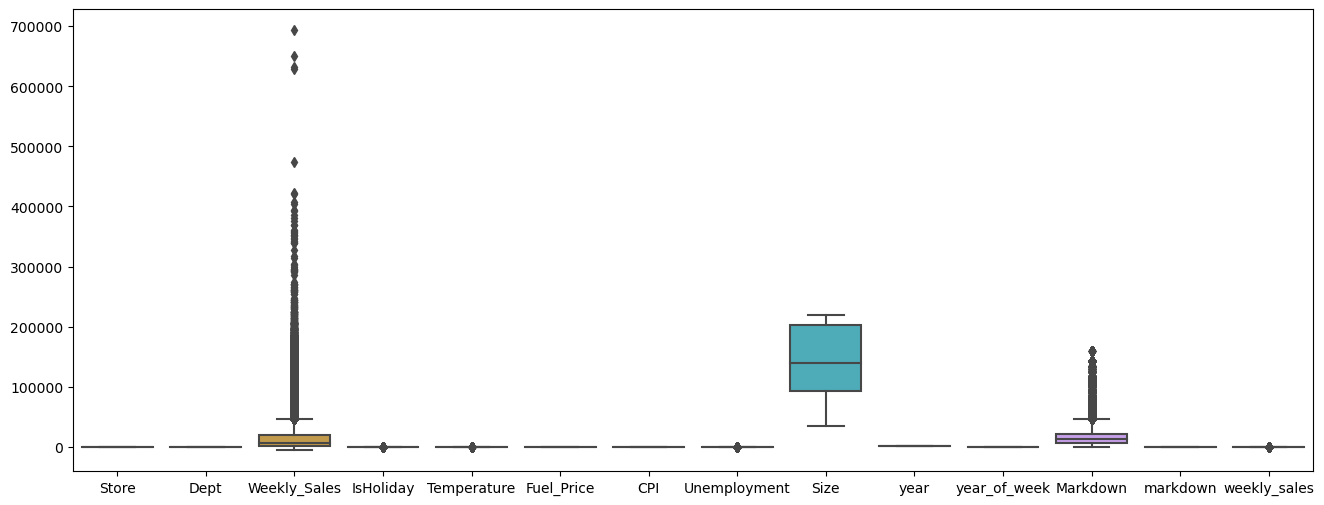

In [110]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data1)
plt.show()

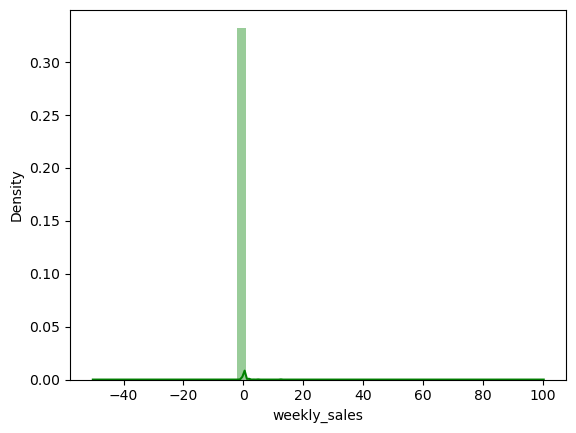

In [112]:
sns.distplot(data1['weekly_sales'],color="g")
plt.show()

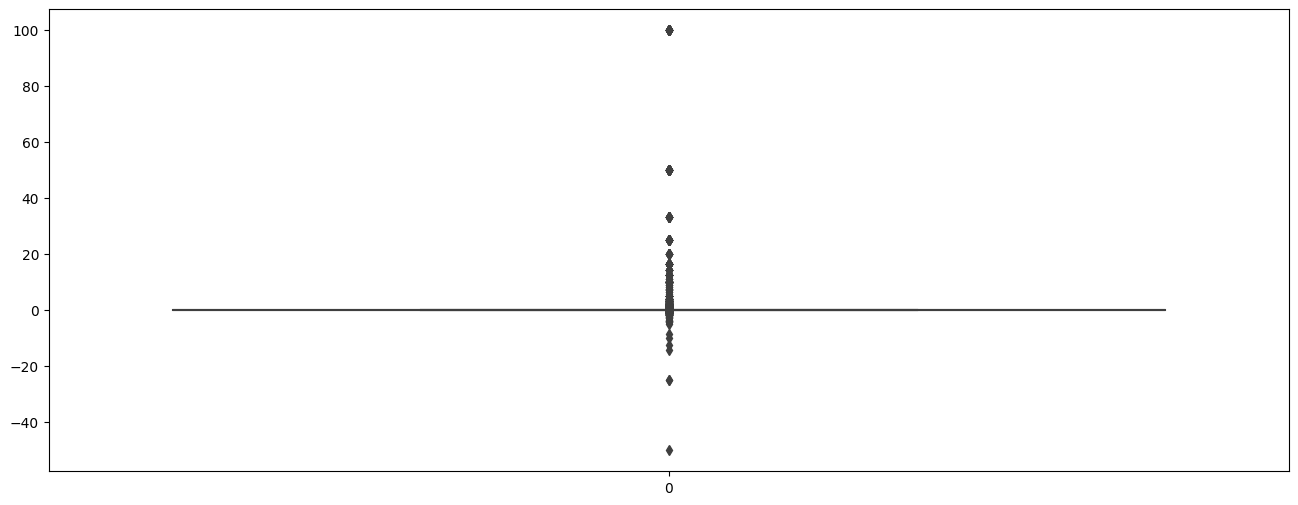

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data1['weekly_sales'])
plt.show()

In [ ]:
data1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown,weekly_sales
0,1,1,2010-05-02,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN,0.000040
1,1,2,2010-05-02,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN,0.000020
2,1,3,2010-05-02,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN,0.000073
3,1,4,2010-05-02,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN,0.000025
4,1,5,2010-05-02,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,17,NaN,0.000031


In [ ]:
data1['IsHoliday'] = data1['IsHoliday'].astype('str')


# Data Preprocesing

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

enc=OrdinalEncoder()

for i in data1.columns:
  if data1[i].dtype == 'object'  :
      print(i)
      col_name = i
      data1[i] = enc.fit_transform(data1[[i]])
      encode = data1[i].sort_values().unique() # 0.0,1.0,2.0 - this is encoded value
      globals()[col_name] = {}
      decoded_data = enc.inverse_transform(data1[[i]])
      decoded = sorted(np.unique(decoded_data)) # original value of dataframe - like decoded value
      globals()[i] = dict(zip(decoded, encode))


IsHoliday
Type


In [ ]:
print(Type)
print(IsHoliday)

{'A': 0.0, 'B': 1.0, 'C': 2.0}
{'False': 0.0, 'True': 1.0}


In [ ]:
data1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown,weekly_sales
0,1,1,2010-05-02,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,NaN,0.000040
1,1,2,2010-05-02,50605.27,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,NaN,0.000020
2,1,3,2010-05-02,13740.12,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,NaN,0.000073
3,1,4,2010-05-02,39954.04,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,NaN,0.000025
4,1,5,2010-05-02,32229.38,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,NaN,0.000031


In [ ]:
null_data = data1[data1['markdown'].isnull()==True]
null_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown,weekly_sales
0,1,1,2010-05-02,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,NaN,0.000040
1,1,2,2010-05-02,50605.27,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,NaN,0.000020
2,1,3,2010-05-02,13740.12,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,NaN,0.000073
3,1,4,2010-05-02,39954.04,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,NaN,0.000025
4,1,5,2010-05-02,32229.38,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,NaN,0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418112,45,93,2011-04-11,1640.50,0.0,43.92,3.551,187.970363,8.523,1.0,118221,2011,15,NaN,0.000610
418113,45,94,2011-04-11,3160.91,0.0,43.92,3.551,187.970363,8.523,1.0,118221,2011,15,NaN,0.000316
418114,45,95,2011-04-11,53342.74,0.0,43.92,3.551,187.970363,8.523,1.0,118221,2011,15,NaN,0.000019
418115,45,97,2011-04-11,6093.25,0.0,43.92,3.551,187.970363,8.523,1.0,118221,2011,15,NaN,0.000164


In [ ]:
not_null_data = data1[data1['markdown'].isnull()==False]
not_null_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown,weekly_sales
6587,1,1,2011-11-11,18689.54,0.0,59.11,3.297,217.998085,7.866,0.0,151315,2011,45,25671.68,0.000054
6588,1,2,2011-11-11,44936.47,0.0,59.11,3.297,217.998085,7.866,0.0,151315,2011,45,25671.68,0.000022
6589,1,3,2011-11-11,9959.64,0.0,59.11,3.297,217.998085,7.866,0.0,151315,2011,45,25671.68,0.000100
6590,1,4,2011-11-11,36826.52,0.0,59.11,3.297,217.998085,7.866,0.0,151315,2011,45,25671.68,0.000027
6591,1,5,2011-11-11,31002.65,0.0,59.11,3.297,217.998085,7.866,0.0,151315,2011,45,25671.68,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0.0,58.85,3.882,192.308899,8.667,1.0,118221,2012,43,5247.26,0.000402
421566,45,94,2012-10-26,5203.31,0.0,58.85,3.882,192.308899,8.667,1.0,118221,2012,43,5247.26,0.000192
421567,45,95,2012-10-26,56017.47,0.0,58.85,3.882,192.308899,8.667,1.0,118221,2012,43,5247.26,0.000018
421568,45,97,2012-10-26,6817.48,0.0,58.85,3.882,192.308899,8.667,1.0,118221,2012,43,5247.26,0.000147


In [ ]:
import scipy.stats as st
# st.f_oneway(not_null_data['IsHoliday'],not_null_data['weekly_sales'])
tab = pd.crosstab(not_null_data['IsHoliday'],not_null_data['Type'])
st.chi2_contingency(tab)

Chi2ContingencyResult(statistic=0.11978797339926359, pvalue=0.9418643784429717, dof=2, expected_freq=array([[71030.33473107, 54078.44903754, 14332.21623139],
       [ 6109.66526893,  4651.55096246,  1232.78376861]]))

<Axes: >

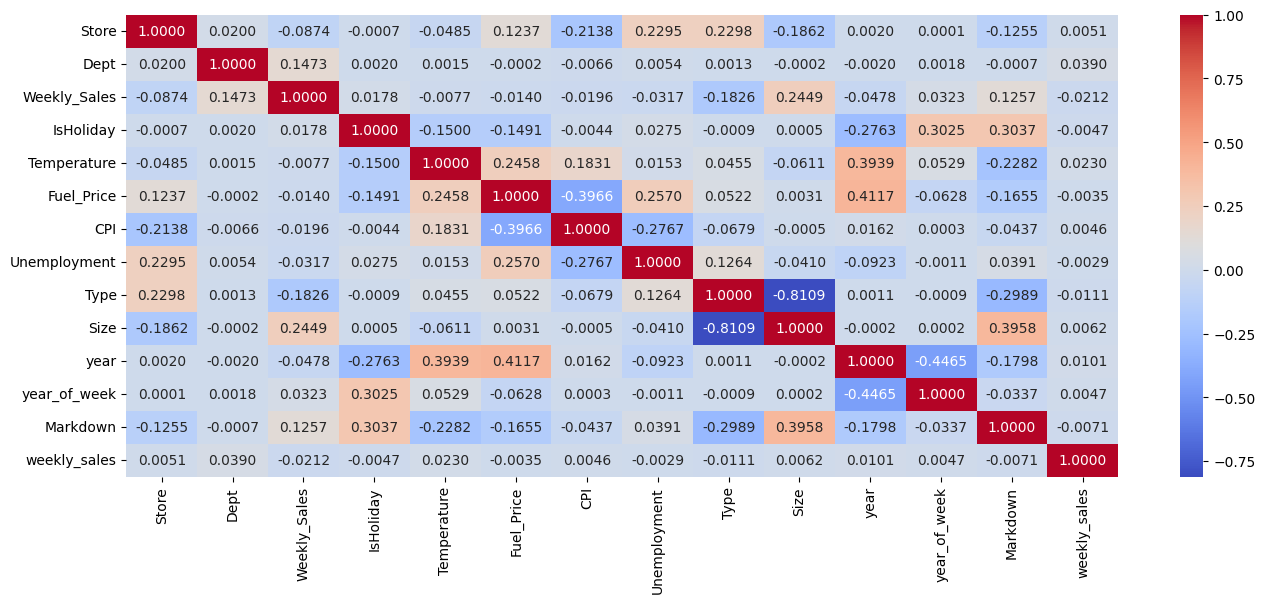

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
sns.heatmap(not_null_data.corr(),annot=True,cmap="coolwarm",fmt=".4f")

# Machine learning for filling the null values in 'markdown' column

In [ ]:
x = not_null_data.drop(['markdown','Weekly_Sales','Size','Type','Date'],axis = 1)
y = not_null_data['markdown']
y

6587      25671.68
6588      25671.68
6589      25671.68
6590      25671.68
6591      25671.68
            ...   
421565     5247.26
421566     5247.26
421567     5247.26
421568     5247.26
421569     5247.26
Name: Markdown, Length: 151435, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=250,random_state=10,max_depth=15,min_samples_split=5)
model.fit(x,y)
y_pred = model.predict(null_data.drop(['markdown','Weekly_Sales','Size','Type','Date'],axis = 1))

In [ ]:
y_pred

array([45896.1169437, 45896.1169437, 45896.1169437, ..., 34561.5512269,
       34561.5512269, 34561.5512269])

In [ ]:
y_pred1 = model.predict(x)

In [ ]:
y_pred1 = model.predict(x)
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(y, y_pred1)

1698.8223155279738

In [ ]:
print(y_pred1)

[22400.85171411 22400.85171411 22400.85171411 ...  5412.2410616
  5412.2410616   5412.2410616 ]


In [ ]:
null_data['markdown'] = y_pred

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x, y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred = neigh.predict(null_data.drop(['markdown','Weekly_Sales','Size','Type','Date'],axis = 1))
y_pred

array([52955.06      , 52955.06      , 52955.06      , ...,
       83809.57      , 83809.57      , 60357.21666667])

In [ ]:
y_pred1 = neigh.predict(x)
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y, y_pred1))
y_pred1

996.8622321788232


array([30856.85      , 25671.68      , 25671.68      , ...,
        5247.26      ,  5247.26      ,  4825.64666667])

In [ ]:
# null_data['markdown'] = y_pred

<ipython-input-238-98f8aba13afc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_data['Markdown'] = y_pred


In [ ]:
null_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown,weekly_sales
0,1,1,2010-05-02,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000040
1,1,2,2010-05-02,50605.27,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000020
2,1,3,2010-05-02,13740.12,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000073
3,1,4,2010-05-02,39954.04,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000025
4,1,5,2010-05-02,32229.38,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418112,45,93,2011-04-11,1640.50,0.0,43.92,3.551,187.970363,8.523,1.0,118221,2011,15,34561.551227,0.000610
418113,45,94,2011-04-11,3160.91,0.0,43.92,3.551,187.970363,8.523,1.0,118221,2011,15,34561.551227,0.000316
418114,45,95,2011-04-11,53342.74,0.0,43.92,3.551,187.970363,8.523,1.0,118221,2011,15,34561.551227,0.000019
418115,45,97,2011-04-11,6093.25,0.0,43.92,3.551,187.970363,8.523,1.0,118221,2011,15,34561.551227,0.000164


In [ ]:
null_data['markdown'].max()

149962.6713200002

In [ ]:
# pd.set_option('display.max_rows', 100)


In [ ]:
data = null_data.merge(not_null_data,how = 'outer')
data.shape

(421570, 15)

In [ ]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown,weekly_sales
0,1,1,2010-05-02,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000040
1,1,2,2010-05-02,50605.27,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000020
2,1,3,2010-05-02,13740.12,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000073
3,1,4,2010-05-02,39954.04,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000025
4,1,5,2010-05-02,32229.38,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0.0,58.85,3.882,192.308899,8.667,1.0,118221,2012,43,5247.260000,0.000402
421566,45,94,2012-10-26,5203.31,0.0,58.85,3.882,192.308899,8.667,1.0,118221,2012,43,5247.260000,0.000192
421567,45,95,2012-10-26,56017.47,0.0,58.85,3.882,192.308899,8.667,1.0,118221,2012,43,5247.260000,0.000018
421568,45,97,2012-10-26,6817.48,0.0,58.85,3.882,192.308899,8.667,1.0,118221,2012,43,5247.260000,0.000147


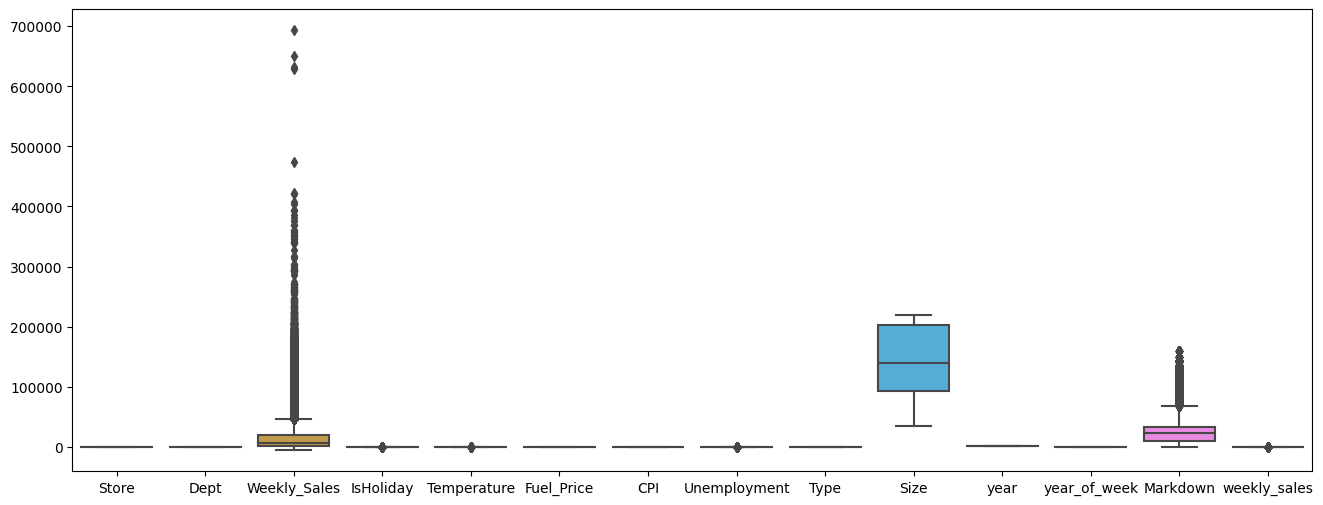

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data)
plt.show()

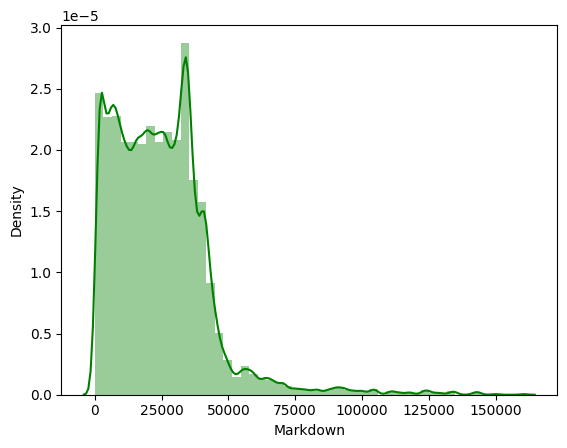

In [ ]:
sns.distplot(data['markdown'],color="g")
plt.show()

In [ ]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
year            0
year_of_week    0
Markdown        0
weekly_sales    0
dtype: int64

# After filling the 'markdown' column storing the data in to  new file

In [ ]:
data.to_csv('Cleaned_Store_data2.csv',index = False)

In [ ]:
df = pd.read_csv('/content/Cleaned_Store_data2.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,year_of_week,Markdown,weekly_sales
0,1,1,2010-05-02,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000040
1,1,2,2010-05-02,50605.27,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000020
2,1,3,2010-05-02,13740.12,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000073
3,1,4,2010-05-02,39954.04,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000025
4,1,5,2010-05-02,32229.38,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,17,45896.116944,0.000031


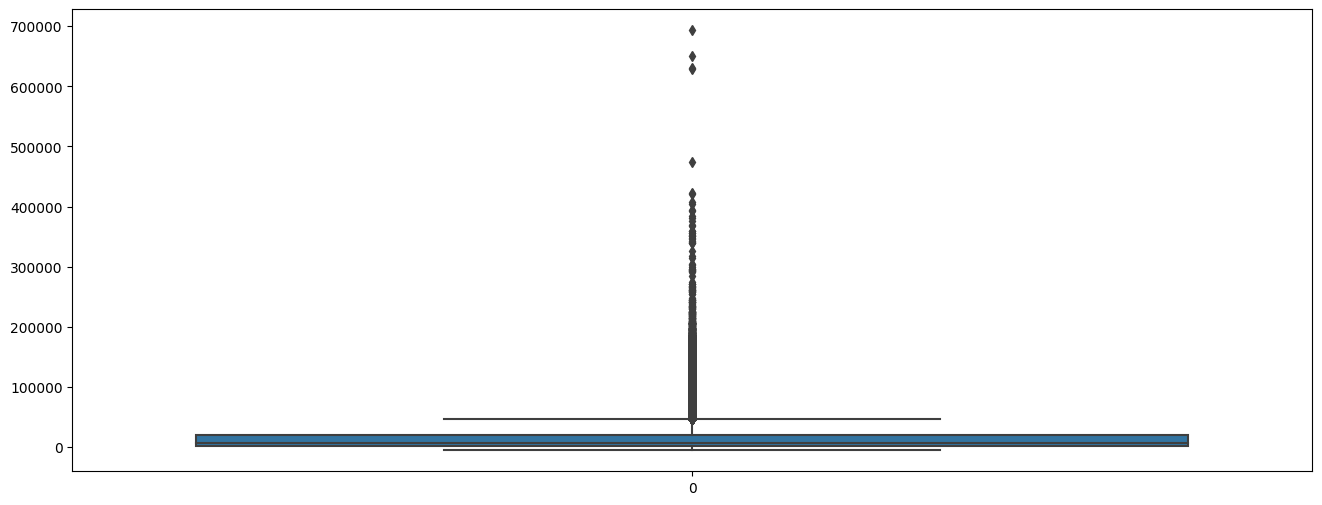

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df['Weekly_Sales'])
plt.show()

In [ ]:
df.drop(['Date','weekly_sales'],axis = 1, inplace = True)

# Seperating the continuous and categorical column for checking the corelation and hypothesis testing

In [ ]:
continuous = df[['markdown','Unemployment','CPI','Fuel_Price','Temperature','Weekly_Sales']]
continuous.head()

,Markdown,Unemployment,CPI,Fuel_Price,Temperature,Weekly_Sales
0,45896.116944,8.106,211.096358,2.572,42.31,24924.50
1,45896.116944,8.106,211.096358,2.572,42.31,50605.27
2,45896.116944,8.106,211.096358,2.572,42.31,13740.12
3,45896.116944,8.106,211.096358,2.572,42.31,39954.04
4,45896.116944,8.106,211.096358,2.572,42.31,32229.38


In [ ]:
categorical = df[['Store','Size','Dept','IsHoliday','year','year_of_week','Type']]
categorical.head()

,Store,Size,Dept,IsHoliday,year,year_of_week,Type
0,1,151315,1,0.0,2010,17,0.0
1,1,151315,2,0.0,2010,17,0.0
2,1,151315,3,0.0,2010,17,0.0
3,1,151315,4,0.0,2010,17,0.0
4,1,151315,5,0.0,2010,17,0.0


<Axes: >

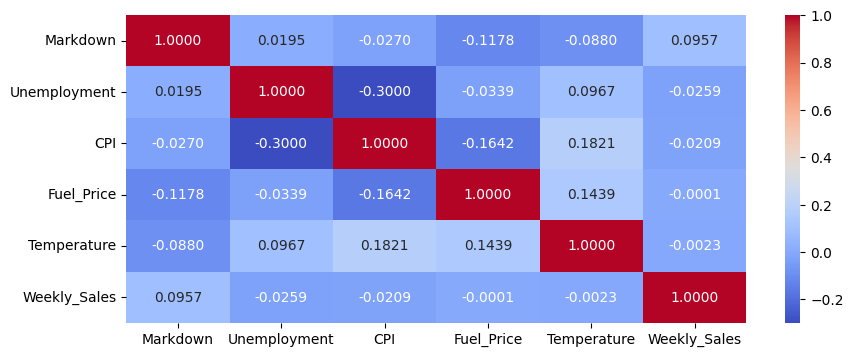

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.heatmap(continuous.corr(),annot=True,cmap="coolwarm",fmt=".4f")

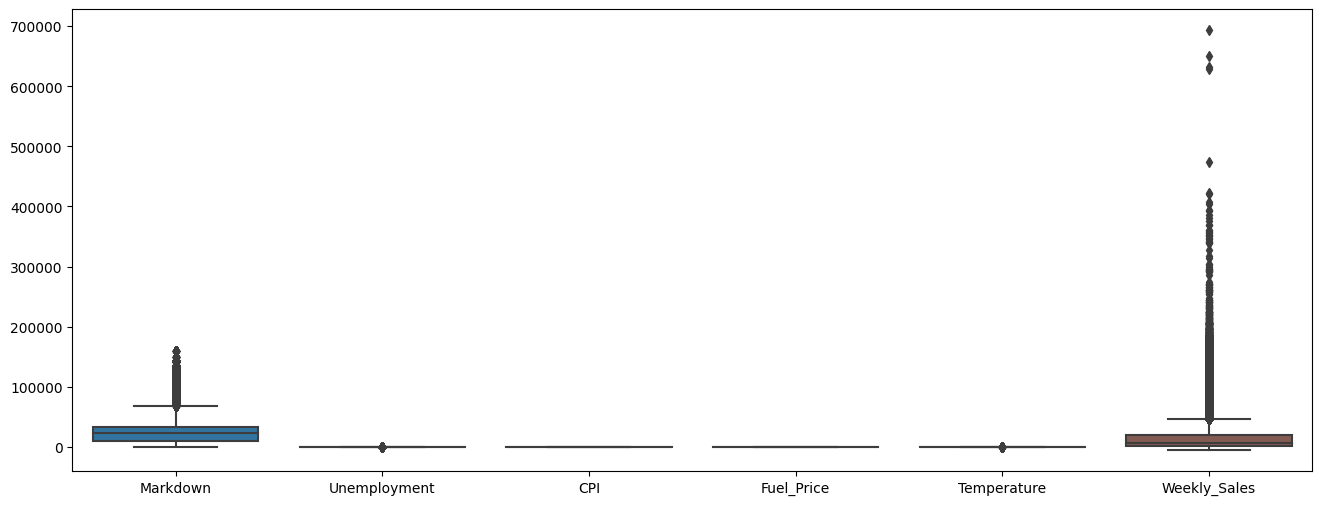

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=continuous)
plt.show()

In [ ]:
for i in df.columns:
  print(i, df[i].skew())

Store 0.07776250174537752
Dept 0.35822319347133663
Weekly_Sales 3.262013869766834
IsHoliday 3.3598665552626987
Temperature -0.32140415196998195
Fuel_Price -0.10490149562840861
CPI 0.08521928473260003
Unemployment 1.1837425684974328
Type 0.6933113912785097
Size -0.3258497664635349
year 0.05623644391430093
year_of_week 0.018852693756725977
Markdown 1.8746908809881098


In [ ]:
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

for i in continuous.columns:
  for j in continuous.columns:
    f_statistic, p_value = stats.f_oneway(df[i],df[j])
    if p_value > 0.05:
      print(i,j,p_value)


Markdown Markdown 1.0
Unemployment Unemployment 1.0
CPI CPI 1.0
Fuel_Price Fuel_Price 1.0


In [ ]:
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")

for i in categorical.columns:
  for j in categorical.columns:
    contingency_table = pd.crosstab(df[i], df[j])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value > 0.05:
      print(i,j,p_value)


Store IsHoliday 1.0
Store year 0.9999930970270402
Store year_of_week 1.0
Size IsHoliday 1.0
Size year 0.9999373554912366
Size year_of_week 1.0
Dept year_of_week 1.0
IsHoliday Store 1.0
IsHoliday Size 1.0
IsHoliday Type 0.8019943216474763
year Store 0.9999930970270402
year Size 0.9999373554912366
year_of_week Store 1.0
year_of_week Size 1.0
year_of_week Dept 1.0
year_of_week Type 1.0
Type IsHoliday 0.8019943216474763
Type year_of_week 1.0


In [ ]:
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")

for i in df.columns:
  for j in df.columns:
    f_statistic, p_value = f_oneway(df[i],df[j])
    if p_value > 0.05:
      print(i,j,p_value)

Dept Dept 1.0
Fuel_Price Fuel_Price 1.0
CPI CPI 1.0
Unemployment Unemployment 1.0
Size Size 1.0
year year 1.0
year_of_week year_of_week 1.0
Markdown Markdown 1.0


In [ ]:
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")

for i in df.columns:
  print(f_oneway(df[i],df['Weekly_Sales']))

F_onewayResult(statistic=208164.56686223278, pvalue=0.0)
F_onewayResult(statistic=207589.1767884599, pvalue=0.0)
F_onewayResult(statistic=-6.637508016400543e-29, pvalue=nan)
F_onewayResult(statistic=208742.34961140645, pvalue=0.0)
F_onewayResult(statistic=207177.23491288495, pvalue=0.0)
F_onewayResult(statistic=208656.3947630382, pvalue=0.0)
F_onewayResult(statistic=204295.12886950056, pvalue=0.0)
F_onewayResult(statistic=208536.2868267722, pvalue=0.0)
F_onewayResult(statistic=208728.77715366794, pvalue=0.0)
F_onewayResult(statistic=1451526.3140741193, pvalue=0.0)
F_onewayResult(statistic=159515.72465804353, pvalue=0.0)
F_onewayResult(statistic=208065.0910932369, pvalue=0.0)
F_onewayResult(statistic=35863.37980643605, pvalue=0.0)


In [ ]:
categorical1 = df[['Store','Dept','year','year_of_week']]
categorical1.head()

,Store,Dept,year,year_of_week
0,1,1,2010,17
1,1,2,2010,17
2,1,3,2010,17
3,1,4,2010,17
4,1,5,2010,17


In [ ]:
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")

for i in categorical1.columns:
  for j in categorical1.columns:
    contingency_table = pd.crosstab(df[i], df[j])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value > 0.05:
      print(i,j,p_value)


Store year 0.9999930970270402
Store year_of_week 1.0
Dept year_of_week 1.0
year Store 0.9999930970270402
year_of_week Store 1.0
year_of_week Dept 1.0


In [ ]:
df.drop(['Fuel_Price','Temperature','Size','Type'],axis = 1, inplace = True)

In [ ]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,CPI,Unemployment,year,year_of_week,Markdown
0,1,1,24924.50,0.0,211.096358,8.106,2010,17,45896.116944
1,1,2,50605.27,0.0,211.096358,8.106,2010,17,45896.116944
2,1,3,13740.12,0.0,211.096358,8.106,2010,17,45896.116944
3,1,4,39954.04,0.0,211.096358,8.106,2010,17,45896.116944
4,1,5,32229.38,0.0,211.096358,8.106,2010,17,45896.116944


In [ ]:
data = df.copy()

# Applying inverse transformation for 'markdown' Column

In [ ]:
def inv_trans(x):
  if x == 0:
    return x
  else:
    return 1/x

data['markdown'] = data['markdown'].apply(inv_trans)

In [ ]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday,CPI,Unemployment,year,year_of_week,Markdown
0,1,1,24924.50,0.0,211.096358,8.106,2010,17,0.000022
1,1,2,50605.27,0.0,211.096358,8.106,2010,17,0.000022
2,1,3,13740.12,0.0,211.096358,8.106,2010,17,0.000022
3,1,4,39954.04,0.0,211.096358,8.106,2010,17,0.000022
4,1,5,32229.38,0.0,211.096358,8.106,2010,17,0.000022


# Machine learning for predicting the Weekly sales

In [ ]:
x = data.drop(['Weekly_Sales','Unemployment','CPI','IsHoliday'],axis = 1)
y = data['Weekly_Sales']
x

,Store,Dept,year,year_of_week,Markdown
0,1,1,2010,17,0.000022
1,1,2,2010,17,0.000022
2,1,3,2010,17,0.000022
3,1,4,2010,17,0.000022
4,1,5,2010,17,0.000022
...,...,...,...,...,...
421565,45,93,2012,43,0.000191
421566,45,94,2012,43,0.000191
421567,45,95,2012,43,0.000191
421568,45,97,2012,43,0.000191


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 35)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((316177, 5), (105393, 5), (316177,), (105393,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42,max_depth=50,min_samples_split=5)#,min_samples_split=10, max_depth=10)4294967295
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

2620.7718064166033
778.3961901440484


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=300,random_state=10,max_depth=25,min_samples_split=2)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)
y_pred1 = model1.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

2155.4943942245186
879.9785837267076


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x, y)
y_pred= neigh.predict(x_test)
y_pred1 = neigh.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

5424.146595684251
5388.086508150832


In [ ]:
from sklearn.tree import ExtraTreeRegressor

model = ExtraTreeRegressor(random_state=42,max_depth=100,min_samples_split=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

3098.5117999093586
1452.5843964118087


In [ ]:
from sklearn.ensemble import BaggingRegressor

model1 = BaggingRegressor(n_estimators=100,random_state=10,max_samples=10)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)
y_pred1 = model1.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

14440.652388664028
14355.164143449509


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model1 = AdaBoostRegressor(n_estimators=1000,random_state=30,learning_rate=0.1)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)
y_pred1 = model1.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

27381.620340668185
27302.62750721021


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model1 = GradientBoostingRegressor(n_estimators=1000,random_state=30,learning_rate=0.1)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)
y_pred1 = model1.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))